In [ ]:
# ref: originally from: 
# https://github.com/VOLTTRON/volttron/blob/main/examples/JupyterNotebooks/Aggregator.ipynb

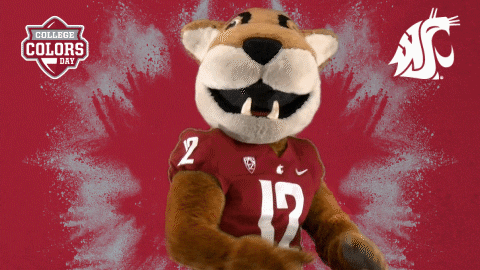

In [23]:
! export VOLTTRON_ROOT="/home/kefei/sandbox/volttron/"
! export VOLTTRON_HOME="/home/kefei/.volttron/"

In [24]:
# VOLTTRON_ROOT="~/sandbox/volttron"
# VOLTTRON_HOME="~/.volttron"
VOLTTRON_ROOT="/home/kefei/sandbox/volttron/"
VOLTTRON_HOME="/home/kefei/.volttron/"

In [25]:
! echo $VOLTTRON_ROOT

/home/kefei/sandbox/volttron/


In [26]:
%env VOLTTRON_ROOT

UsageError: Environment does not have key: VOLTTRON_ROOT


In [27]:
! ls $VOLTTRON_ROOT

aggregator_dummy.ipynb	docs	      README.md		stop-volttron
bootstrap.py		env	      readthedocs.yml	TERMS.md
ci-integration		examples      RELEASE_NOTES.md	Untitled.ipynb
configs			integrations  requirements.py	volttron
CONTRIBUTING.md		LICENSE.md    scripts		volttron_data
COPYRIGHT		__pycache__   services		volttron.egg-info
debugging_utils		pylintrc      setup.py		volttron.log
deprecated		pytest.ini    start-volttron	volttrontesting


In [28]:
! ls ~/sandbox/volttron/

aggregator_dummy.ipynb	docs	      README.md		stop-volttron
bootstrap.py		env	      readthedocs.yml	TERMS.md
ci-integration		examples      RELEASE_NOTES.md	Untitled.ipynb
configs			integrations  requirements.py	volttron
CONTRIBUTING.md		LICENSE.md    scripts		volttron_data
COPYRIGHT		__pycache__   services		volttron.egg-info
debugging_utils		pylintrc      setup.py		volttron.log
deprecated		pytest.ini    start-volttron	volttrontesting


In [29]:
import datetime
import json
import os
import pprint
import sqlite3
import subprocess
import sys
import time

# Define a "run this shell command" method, wrapping subprocess.check_output()
def _sh(shell_command, shell=True, stderr=None):
    try:
        return_value = subprocess.check_output(shell_command, shell=shell, stderr=stderr)
    except Exception as err:
        print('Shell command failed: {}', shell_command)
        print(err)
        return_value = 'Error'
    return return_value

# Same as _sh(), except that this also prints the command output, preceded by an optional label.
def _print_sh(shell_command, label=None, **kwargs):
    print('{0}: {1}\n'.format(label+':' if label else '', _sh(shell_command, **kwargs)))

# Set up local variables vhome and vroot.
# The environment variables VOLTTRON_ROOT and VOLTTRON_HOME should already be defined -- see above.
# ref: https://stackoverflow.com/questions/37890898/how-to-set-env-variable-in-jupyter-notebook
# vroot = %env VOLTTRON_ROOT
# vhome = %env VOLTTRON_HOME
vroot = VOLTTRON_ROOT
vhome = VOLTTRON_HOME
print("VOLTTRON_ROOT={}".format(vroot))
print("VOLTTRON_HOME={}".format(vhome))

# Define a VIP_SOCKET environment variable for use while installing and running agents.
socket_name = 'ipc://' + vhome + '/run/vip.socket'
%env VIP_SOCKET=$socket_name

# Run from the VOLTTRON root directory.
os.chdir(vroot)

data_dir = vhome + '/data'

print("Initialization complete")

VOLTTRON_ROOT=/home/kefei/sandbox/volttron/
VOLTTRON_HOME=/home/kefei/.volttron/
env: VIP_SOCKET=ipc:///home/kefei/.volttron//run/vip.socket
Initialization complete


In [30]:
# Setup: Shut Down All Agents
# This ensures a clean agent installation process by the notebook.

In [31]:
print('Wait for the list to be displayed, and confirm that no agents are listed as running...\n')

# Shut down all agents.
_sh('volttron-ctl shutdown')

# List agent status to verify that the status of each agent is 0 or blank.
_print_sh('volttron-ctl status', stderr=subprocess.STDOUT)

Wait for the list to be displayed, and confirm that no agents are listed as running...

: b'UUID AGENT                    IDENTITY            TAG                STATUS          HEALTH\n6 listeneragent-3.3        listeneragent-3.3_1 listener           0               \n9 platform_driveragent-4.0 platform.driver     platform_driver    0               \nb sqlhistorianagent-4.0.0  platform.historian  platform_historian 0               \n'



In [32]:
# Setup: Discover the Aggregator's Network Parameters
# Each Collector and Observer must know this Aggregator's network parameters so that it can forward data to it or pull data from it. Discover those parameters now.

# Copy the vip-address's IP and port, and the serverkey, to the Collector or Observer notebook under 'Setup: Configure the Aggregator's Network Parameters'.

# Also, make sure that this port is open for TCP access on the Aggregator's host.

In [101]:
# Be careful don't expose this
_print_sh('curl ifconfig.me', label='Public IP address')
#   % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
#                                  Dload  Upload   Total   Spent    Left  Speed
#   0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

# Public IP address:: b'0.0.0.5'

# 100    12  100    12    0     0     30      0 --:--:-- --:--:-- --:--:--    30


In [94]:
# Obtain this server's IP address, volttron port number (usually 22916), and server key:
# Be careful don't expose this

# Uncomment us

# print('Obtaining network parameters and server key; please wait...\n')
# _print_sh('curl ifconfig.me', label='Public IP address')
# _print_sh('volttron-ctl auth serverkey', label='Serverkey')
# _print_sh('cat {}/config'.format(vhome), label='Config file')

In [34]:
# Setup: Add Each Collector and Observer to known_hosts
# Do the following for each Collector and Observer, substituting that server's IP address, port number and server key below.

# Get each Collector's data from 'Setup: Update the Aggregator's known_hosts File' in the Collector notebook.

# Get each Observer's data from 'Setup: Update the Aggregator's known_hosts File' in the Observer notebook.

In [36]:
# For each remote VOLTTRON instance (Collector or Observer),
# change the following three strings and then execute this code
# to add the instance's properties to the Aggregator's known_hosts file:
remote_ip_address = 'foo'
remote_port_number = '22916'
remote_server_key = 'bar'

_sh('volttron-ctl auth add-known-host --host {0}:{1} --serverkey {2}'.format(remote_ip_address, 
                                                                             remote_port_number, 
                                                                             remote_server_key))
with open(vhome + '/known_hosts', 'r') as kh_file:
    print ('known_hosts file contents are now: \n{0}'.format(kh_file.read()))

known_hosts file contents are now: 
{
    "@": "RSEE4FXYHJemqqRHehqxSt2Dpx-lu6Q7Y7lFj8RghDI",
    "127.0.0.1:22916": "RSEE4FXYHJemqqRHehqxSt2Dpx-lu6Q7Y7lFj8RghDI",
    "foo:22916": "bar"
}


In [37]:
# Setup: Configure a SQLHistorian

In [38]:
# Create a SQLHistorian configuration specifically for this project

# The historian's database will reside in $VOLTTRON_HOME/data. 
# Make sure that the directory exists.
if not os.path.exists(data_dir):
    _sh('mkdir {0}'.format(data_dir))

config = '''{{
    "agentid": "sqlhistorian-sqlite",
    "connection": {{
        "type": "sqlite",
        "params": {{
            "database": "{0}/historian.sqlite"
        }}
    }},
    "tables_def": {{
        "table_prefix": "",
        "data_table": "data_table",
        "topics_table": "topics_table",
        "meta_table": "meta_table"
    }}
}}'''.format(data_dir)
print("config = {}".format(config))
config_path = vhome + '/my_aggregator_historian.config'
with open(config_path, 'w') as file:
    file.write(config)
print('Historian configuration written to {}'.format(config_path))

config = {
    "agentid": "sqlhistorian-sqlite",
    "connection": {
        "type": "sqlite",
        "params": {
            "database": "/home/kefei/.volttron//data/historian.sqlite"
        }
    },
    "tables_def": {
        "table_prefix": "",
        "data_table": "data_table",
        "topics_table": "topics_table",
        "meta_table": "meta_table"
    }
}
Historian configuration written to /home/kefei/.volttron//my_aggregator_historian.config


In [39]:
# Setup: Install Agents
# Install each agent employed by the Aggregator: a SQLHistorian and 2 Volttron Central agents.

In [ ]:
print('Wait for the list to be displayed, then confirm that all of these agents appear in it...')

def install_agent(dir=None, id=None, config=None, tag=None):
    script_install_command = 'python scripts/install-agent.py -s {0} -i {1} -c {2} -t {3} -f'
    _sh(script_install_command.format(dir, id, config, tag))
    print('Installed {}'.format(tag))

# Install a SQL Historian agent that captures metrics in a SQLite database
install_agent(dir=vroot+'/services/core/SQLHistorian',
              id='sqlite_historian',
              config=vhome + '/my_aggregator_historian.config',
              tag='sqlite_historian')

# Install a Platform Agent
install_agent(dir=vroot+'/services/core/VolttronCentralPlatform',
              id='platform.agent',
              config=vroot+'/services/core/VolttronCentralPlatform/config', 
              tag='vcp')

# Install a Volttron Central Agent
install_agent(dir=vroot+'/services/core/VolttronCentral',
              id='volttron.central',
              config=vroot+'/services/core/VolttronCentral/config', 
              tag='vc')

# List agent status to verify that the agents were installed successfully.
_print_sh('volttron-ctl status', stderr=subprocess.STDOUT)

In [41]:
# Execution: Refresh variables, stop agents, delete database

In [44]:
print('Make a fresh start - refresh variable definitions, shut down any running agents, refresh the database')

import datetime
import json
import os
import pprint
import sqlite3
import subprocess
import sys
import time

# Define a "run this shell command" method, wrapping subprocess.check_output()
def _sh(shell_command, shell=True, stderr=None):
    try:
        return_value = subprocess.check_output(shell_command, shell=shell, stderr=stderr)
    except Exception as err:
        print('Shell command failed: {}', shell_command)
        print(err)
        return_value = 'Error'
    return return_value

# Same as _sh(), except that this also prints the command output, preceded by an optional label.
def _print_sh(shell_command, label=None, **kwargs):
    print('{0}: {1}\n'.format(label+':' if label else '', _sh(shell_command, **kwargs)))

# Set up local variables vhome and vroot.
# The environment variables VOLTTRON_ROOT and VOLTTRON_HOME should already be defined -- see above.
# vroot = %env VOLTTRON_ROOT
# vhome = %env VOLTTRON_HOME
vroot = VOLTTRON_ROOT
vhome = VOLTTRON_HOME
print("VOLTTRON_ROOT={}".format(vroot))
print("VOLTTRON_HOME={}".format(vhome))

# Define a VIP_SOCKET environment variable for use while installing and running agents.
socket_name = 'ipc://' + vhome + '/run/vip.socket'
%env VIP_SOCKET=$socket_name

# Run from the VOLTTRON root directory.
os.chdir(vroot)

data_dir = vhome + '/data'

# Delete the Historian's SQLite database to get a fresh start.
if os.path.exists(data_dir + '/historian.sqlite'):
    _sh('rm {0}'.format(data_dir + '/historian.sqlite'))

# Shut down all agents.
_sh('volttron-ctl shutdown')

# List agent status to verify that the status of each agent is 0 or blank.
_print_sh('volttron-ctl status', stderr=subprocess.STDOUT)

Make a fresh start - refresh variable definitions, shut down any running agents, refresh the database
VOLTTRON_ROOT=/home/kefei/sandbox/volttron/
VOLTTRON_HOME=/home/kefei/.volttron/
env: VIP_SOCKET=ipc:///home/kefei/.volttron//run/vip.socket
: b'UUID AGENT                    IDENTITY            TAG                STATUS          HEALTH\n6 listeneragent-3.3        listeneragent-3.3_1 listener           0               \n9 platform_driveragent-4.0 platform.driver     platform_driver    0               \nb sqlhistorianagent-4.0.0  platform.historian  platform_historian 0               \n8 sqlhistorianagent-4.0.0  sqlite_historian    sqlite_historian                   \n3 volttroncentralagent-5.2 volttron.central    vc                                 \n'



In [45]:
# Execution: Start the agents
# When ready to start collecting metrics from Collectors, using the Historian to record them, start the agents.

In [88]:
print('Wait for the list to be displayed, then confirm that each started agent is running...')

_sh('volttron-ctl start --tag sqlite_historian')
_sh('volttron-ctl start --tag vcp')
_sh('volttron-ctl start --tag vc')

# List agent status to verify that the started agents have status "running".
_print_sh('volttron-ctl status', stderr=subprocess.STDOUT)

Wait for the list to be displayed, then confirm that each started agent is running...


start: error: agent not found: vcp


: b'UUID AGENT                    IDENTITY            TAG                STATUS          HEALTH\n6 listeneragent-3.3        listeneragent-3.3_1 listener           0               \n9 platform_driveragent-4.0 platform.driver     platform_driver    0               \nb sqlhistorianagent-4.0.0  platform.historian  platform_historian 0               \n8 sqlhistorianagent-4.0.0  sqlite_historian    sqlite_historian   running [15715] GOOD\n3 volttroncentralagent-5.2 volttron.central    vc                 running [15730] GOOD\n'



In [91]:
! volttron-ctl start --tag sqlite_historian

In [92]:
! volttron-ctl status

UUID AGENT                    IDENTITY            TAG                STATUS          HEALTH
6 listeneragent-3.3        listeneragent-3.3_1 listener           0               
9 platform_driveragent-4.0 platform.driver     platform_driver    0               
b sqlhistorianagent-4.0.0  platform.historian  platform_historian 0               
8 sqlhistorianagent-4.0.0  sqlite_historian    sqlite_historian   running [15715] GOOD
3 volttroncentralagent-5.2 volttron.central    vc                 running [15730] GOOD


In [47]:
# Data Reporting: Prepare to Execute Sqlite Commands

In [57]:
# Define a function that executes SQLite commands on our Historian database
def run_sqlite_cmd(command_string):
    return _print_sh('sqlite3 {0} {1}'.format(data_dir + '/historian.sqlite', command_string))

In [49]:
# Data Reporting: Describe the Historian's Database Schema
# Start the data reporting process by displaying the schema of the Historian's SQLite database.

In [58]:
run_sqlite_cmd('".schema"')

: b'CREATE TABLE data_table (ts timestamp NOT NULL,\n                     topic_id INTEGER NOT NULL,\n                     value_string TEXT NOT NULL,\n                     UNIQUE(topic_id, ts));\nCREATE INDEX data_idx \n                ON data_table (ts ASC);\nCREATE TABLE topics_table (topic_id INTEGER PRIMARY KEY,\n                     topic_name TEXT NOT NULL,\n                     metadata TEXT,\n                     UNIQUE(topic_name));\n'



In [69]:
# Data Reporting: List the Topics
# List each topic in the database's topics_table. This is the list of each type of data that has been captured and stored.

In [73]:
run_sqlite_cmd('"SELECT * FROM topics_table;"')
# run_sqlite_cmd('"SELECT * FROM data;"')

: b''



In [74]:
# Data Reporting: List Values for a Single Topic
# Select a single topic by name, and list each value in the database for it.

In [90]:
topic_name = 'simstorage/soc_kwh'

display_variables = 'ts, value_string'
join_statement = 'INNER JOIN topics_table on (data_table.topic_id = topics_table.topic_id) '
sqlite_cmd = '''"SELECT {0} FROM data_table {1} WHERE topics_table.topic_name = '{2}';"'''.format(
    display_variables,
    join_statement,
    topic_name)
print('sqlite command: \n{0}\n'.format(sqlite_cmd))

run_sqlite_cmd(sqlite_cmd)

sqlite command: 
"SELECT ts, value_string FROM data_table INNER JOIN topics_table on (data_table.topic_id = topics_table.topic_id)  WHERE topics_table.topic_name = 'simstorage/soc_kwh';"

: b''



In [76]:
# Data Reporting: Graph Values for a Single Topic
# Use numpy and matplotlib to produce a graph of the values for a topic.

In [89]:
topic_name = 'simstorage/soc_kwh'

display_variables = 'ts, value_string'
join_statement = 'INNER JOIN topics_table on (data_table.topic_id = topics_table.topic_id) '
sqlite_cmd = '''SELECT {0} FROM data_table {1} WHERE topics_table.topic_name = '{2}';'''.format(
    display_variables,
    join_statement,
    topic_name)
print('sqlite command: \n{0}\n'.format(sqlite_cmd))

import numpy
import matplotlib.pyplot as plt
from matplotlib import dates

# Connect to the SQLite database
conn = sqlite3.connect(data_dir + '/historian.sqlite')
c = conn.cursor()

# Populate graphArray with the result of querying the database for the specified topic.
graphArray = []
for row in c.execute(sqlite_cmd):
    # Remove parentheses and single quotes
    row_string_filtered = str(row).translate(None, "()'u\'")
    # In Python 3, the Unicode string would need to be filtered like this:
    row_string_filtered = str(row).translate({ord(c): None for c in "()'u\'"})
    graphArray.append(row_string_filtered)

if graphArray:
    timestamps, values = numpy.loadtxt(graphArray,
                                       delimiter=',',
                                       unpack=True,
                                       converters={0: dates.strpdate2num('%Y-%m-%dT%H:%M:%S.%f+00:00')})
    fig = plt.figure()
    fig.add_subplot(1, 1, 1, facecolor='white')
    plt.plot_date(x=timestamps, y=values, fmt='b-')
    plt.gcf().autofmt_xdate()
    plt.show()
else:
    print('No data returned from query')

sqlite command: 
SELECT ts, value_string FROM data_table INNER JOIN topics_table on (data_table.topic_id = topics_table.topic_id)  WHERE topics_table.topic_name = 'simstorage/soc_kwh';

No data returned from query


In [81]:
data_dir + '/historian.sqlite'

'/home/kefei/.volttron//data/historian.sqlite'

In [84]:
! ls /home/kefei/.volttron//data/

historian.sqlite


In [80]:
conn

In [86]:
# Shutdown: Stop all agents
# When finished, stop all VOLTTRON agents.

In [87]:
# Stop all agents.
_sh('volttron-ctl shutdown')

# Verify that all agents have been stopped.
_print_sh('volttron-ctl status', stderr=subprocess.STDOUT)

: b'UUID AGENT                    IDENTITY            TAG                STATUS          HEALTH\n6 listeneragent-3.3        listeneragent-3.3_1 listener           0               \n9 platform_driveragent-4.0 platform.driver     platform_driver    0               \nb sqlhistorianagent-4.0.0  platform.historian  platform_historian 0               \n8 sqlhistorianagent-4.0.0  sqlite_historian    sqlite_historian   0               \n3 volttroncentralagent-5.2 volttron.central    vc                 0               \n'

